<a href="https://colab.research.google.com/github/badabad/DS-Unit-1-Sprint-2-Statistics/blob/master/1_Sprint_2_Statistics_Study_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This study guide should reinforce and provide practice for all of the concepts you have seen in the past week. There are a mix of written questions and coding exercises, both are equally important to prepare you for the sprint challenge as well as to be able to speak on these topics comfortably in interviews and on the job.

If you get stuck or are unsure of something remember the 20 minute rule. If that doesn't help, then research a solution with google and stackoverflow. Only once you have exausted these methods should you turn to your Team Lead - they won't be there on your SC or during an interview. That being said, don't hesitate to ask for help if you truly are stuck.

Have fun studying!

# Resources

[Scipy Stats Documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)

# General Terms

Define the following terms. *Double click the text to edit the markdown cells.*
<br/><br/>

**Normal Distribution:** It's a regular bell curve probability function. It describe the frequency of a variable's values

**Standard Deviation:** sqrt((x-u)^2/N)

**Z-Score:** x-u/sd

**P-Value:** A low p value is used to reject a null hypothesis

**Null Hypothesis:** The "boring" or expected outcome

**Sample:** The portion of the dataset used to represent the population

**Statistical Signifigance:** The chance of variables being related and not by chance

# T-Test

Answer the following questions as though you are explaining it to a non-technical person. *Double click the text to edit the markdown cells.*
<br/><br/>

1. What is a T-Test? What is it used for?

  it finds the difference in means of two variables. It is used to test if your hypothesis is likely true or bs

2. What is the difference between the normal distribution and the t-distribution?

  A t distribution is wider. A normal distribution shows how values are spread out, whereas a t distribution measures the accuracy of those values

3. What is the difference between a 1-sample and a 2-sample t-test?

  A 1-sample t test looks to see if the population reflects a hypothesized value
  A 2-sample t test compares two different samples and determines how different they are

We are scientists running a drug trial and wanting to know whether our drug reduced patient symptoms. Below are the results (just random numbers), explain in 2-3 sentences whether or not the drug was effective. How can we tell that from the t-test?

```
After running the t-test, look at the p value. If the p value is very high, there is a probable chance of the hypothesis being true. If it is low, we reject the null hypothesis
```

What is likely our null hypothesis?

```
The null hypothesis is that the drug is effective
```

In [ ]:
from scipy import stats
import numpy as np
import pandas as pd

# Get our "results" with random numbers
np.random.seed(42)
with_drug = stats.norm.rvs(loc=5, scale=10, size=500)
without_drug = stats.norm.rvs(loc=5, scale=10, size=500)

# See if our drug made a difference
stats.ttest_ind(with_drug, without_drug)

Ttest_indResult(statistic=-0.40331379088750186, pvalue=0.6868037874359643)

Here is a dataframe of movie ratings. Divide the dataframe by gender and then use t-tests to show which movies have a statistically significant difference in rating when divided by gender. Give a sentence explanation of the results.

In [ ]:
df = pd.DataFrame({'gender':['m','f','f','m','m','m','f','f','m','f'],
                   'jurassic park':[10,9,10,9,9,10,10,10,9,9],
                   'love actually':[6,9,10,7,6,7,10,10,5,8],
                   'pacific rim':[10,3,4,8,9,8,5,4,9,3]})
df.head()

,gender,jurassic park,love actually,pacific rim
0,m,10,6,10
1,f,9,9,3
2,f,10,10,4
3,m,9,7,8
4,m,9,6,9


In [ ]:
# Divide the dataframe here
m = df[df['gender']=='m']
f = df[df['gender']=='f']

**Jurassic Park**

Explanation of results:

```
I fail to reject the null hypothesis that the ratings are significantly different
```

In [ ]:
# T-Test Code Here
stats.ttest_ind(m['jurassic park'],f['jurassic park'])


Ttest_indResult(statistic=-0.5773502691896236, pvalue=0.5795840000000014)

**Love Actually**

Explanation of results:

```
Females prefer love actually. The difference is statistically significant
```

In [ ]:
# T-Test Code Here
stats.ttest_ind(m['love actually'],f['love actually'])

Ttest_indResult(statistic=-5.8423739467217715, pvalue=0.0003861022071216145)

**Pacific Rim**

Explanation of results:

```
Males prefer pacific rim more and the difference is statistically significant
```

In [ ]:
# T-Test Code Here
stats.ttest_ind(m['pacific rim'],f['pacific rim'])

Ttest_indResult(statistic=9.449111825230684, pvalue=1.2936944097439082e-05)

# Confidence Interval

Answer the following question as though you are explaining it to a non-technical person. *Double click the text to edit the markdown cells.*
<br/><br/>

1. What is a confidence interval?

  A confidence interval is a range of values that has a certain percent chance of containing the actual values of a population

Using the movie rating data, graph the ratings with a confidence interval. After graphing the ratings with the confidence interval, write a brief explanation of how to interpret the graph.

```
The bars shows the average rating of each movie. Each bar has a line on it to indicate confidence intervals of 95%. We are 95% certain that the true ratings fall within those lines
```

In [ ]:
import matplotlib.pyplot as plt

# Your Graph Code Here
def CI(data, confidence=.95):
  #calculate confidence interval
  sample = np.array(data)
  s = np.std(sample, ddof=1)
  n = np.size(sample)
  standard_error = s/np.sqrt(n)
  t = stats.t.ppf((1+confidence)/2, n-1)
  #margin of error
  MOE = t*standard_error
  xbar = np.mean(sample)
  lower = xbar-MOE
  upper = xbar+MOE
  return(lower,xbar,upper, MOE)

<function matplotlib.pyplot.show>

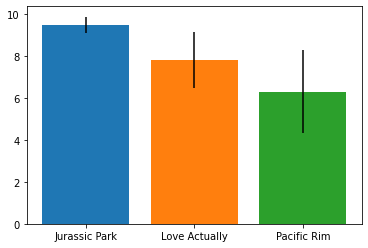

In [ ]:
plt.bar(0,df['jurassic park'].mean(), yerr=CI(df['jurassic park'])[3])
plt.bar(1,df['love actually'].mean(), yerr=CI(df['love actually'])[3])
plt.bar(2,df['pacific rim'].mean(), yerr=CI(df['pacific rim'])[3])
plt.xticks([0,1,2],['Jurassic Park', 'Love Actually','Pacific Rim'])
plt.title="Movie Ratings"
plt.show

# Chi Squared

Answer the following questions as though you are explaining it to a non-technical person. *Double click the text to edit the markdown cells.*
<br/><br/>

1. What is a Chi Squared Test? What is it used for?

  To determine if two variables are related to each other

2. What type of data is it used on?

  ` Your Answer Here `

3. What is a contingency table?

  A contignency table compares two categorical variables to each other. It shows the frequency that variables intersect

4. Define Degrees of Freedom

  The number of possible independent variables

Use the `grades` dataframe below to complete the following:
- Create at least 2 contingency tables
- Use chi-squared tests to find 2 features that are independent of each other.
 - Write a brief interpretation of the results
- Use chi-squared tests to find 2 features that are dependent to each other.
 - Write a brief interpretation of the results

In [ ]:
grades = pd.DataFrame({'good_standing':[True, True, False, False, False, True, True, False, True, True],
                       'grade_1':['A', 'B', 'A', 'C', 'A', 'A', 'D', 'A', 'B', 'B'],
                       'grade_2':['Pass', 'Pass', 'Fail', 'Fail', 'Fail','Pass', 'Pass', 'Fail', 'Pass', 'Fail'],
                       'grade_3':[10, 5, 6, 10, 9, 9, 8, 7, 3, 9]})
df.head()

,gender,jurassic park,love actually,pacific rim
0,m,10,6,10
1,f,9,9,3
2,f,10,10,4
3,m,9,7,8
4,m,9,6,9


In [ ]:
# Contingency Table 1

table1 = pd.crosstab(grades['good_standing'],grades['grade_1'])
chi2_contingency(table1)

(5.0, 0.1717971442967335, 3, array([[2. , 1.2, 0.4, 0.4],
        [3. , 1.8, 0.6, 0.6]]))

In [ ]:
# Contingency Table 2
table2 = pd.crosstab(grades['good_standing'],grades['grade_2'])

In [ ]:
# Chi Squared, independent features
### Perform the chi-square test
stat, p, dof, expected = chi2_contingency(table1, correction=False)

### Print out the stats in a nice format
print('Expected values: \n ', expected.round(2))
print('The degrees of freedom: ', dof)
print(f'The chi square statistics is: {stat:.3f}')
print(f'The p value is: {p:.6f}')

Expected values: 
  [[2.  1.2 0.4 0.4]
 [3.  1.8 0.6 0.6]]
The degrees of freedom:  3
The chi square statistics is: 5.000
The p value is: 0.171797


In [ ]:
# Chi Squared, dependent features
### Perform the chi-square test
stat, p, dof, expected = chi2_contingency(table2, correction=False)

### Print out the stats in a nice format
print('Expected values: \n ', expected.round(2))
print('The degrees of freedom: ', dof)
print(f'The chi square statistics is: {stat:.3f}')
print(f'The p value is: {p:.6f}')

Expected values: 
  [[2. 2.]
 [3. 3.]]
The degrees of freedom:  1
The chi square statistics is: 6.667
The p value is: 0.009823


# Bayesian Statisics

Answer the following questions as though you are explaining it to a non-technical person. *Double click the text to edit the markdown cells.*
<br/><br/>

1. What is the difference between Bayesian and Frequentist Statistics?

  Bayesians rely on prior knowledge

2. What is a prior belief? How is it used in Bayesian Statistics?

  A probability distribution created based on beliefs about an uncertain variable

3. What is the law of total probability?

  You can find the probability of an event by adding up the probability of distinct events

4. What is the law of conditional probability?

  probability of an event given that another event occured

5. Give an example of when you might use bayesian statistics. Do not use an example given during the lecture or assignment.

  

# Graphing

Use any of the dataframes above and make two additional visualizations to explore the data. Make sure to include axis labels and title for each graph.